# Data Understanding & Preprocessing

In [1]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv("supermarket.csv")

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
print(len(df))
for x in df.columns:
    print(x, len(df[x].unique()), df[x].unique())

1000
Invoice ID 1000 ['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-11-3025'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Visualization: 
Let's see the spread of Total across Product line

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

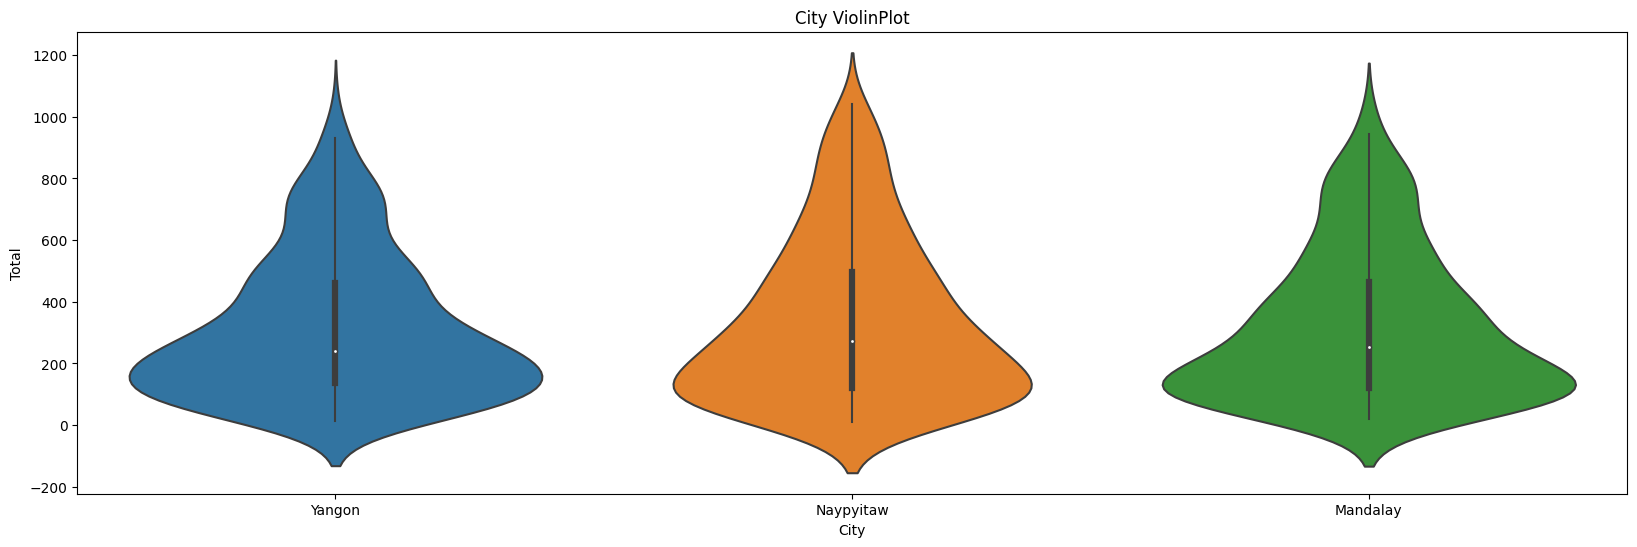

In [8]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df, x="City", y="Total")
plt.title("City ViolinPlot")
plt.show()

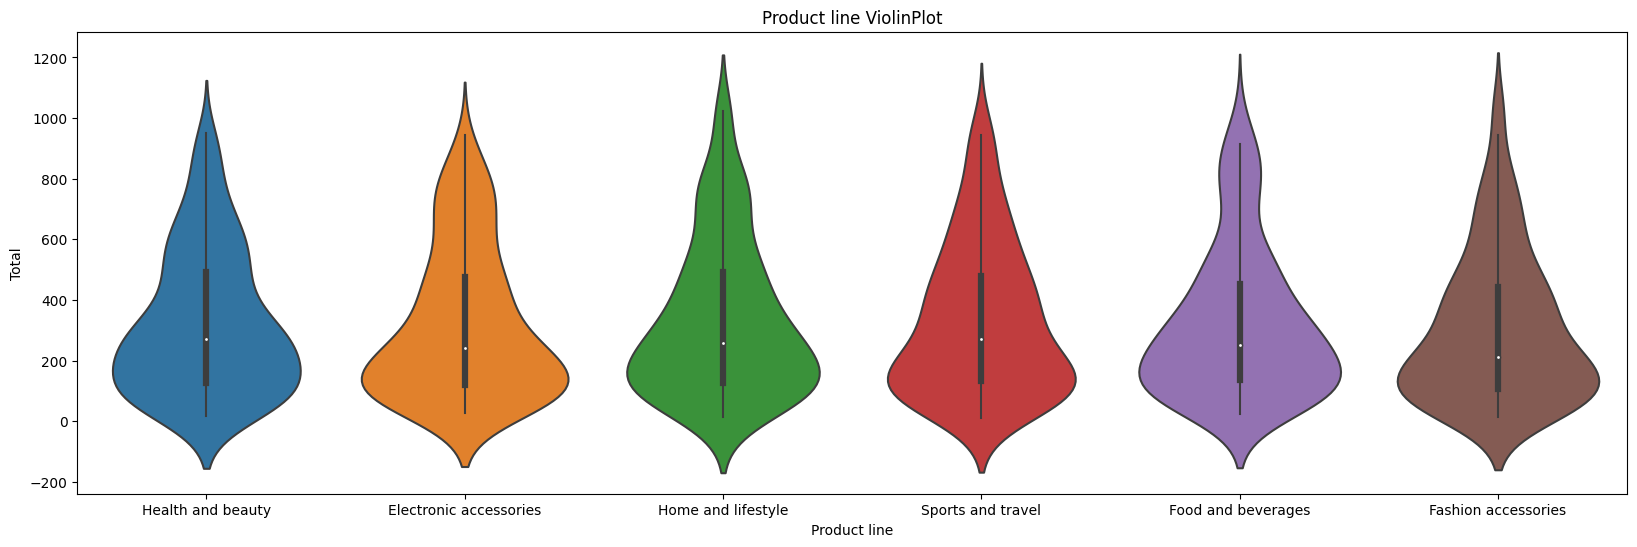

In [9]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df, x="Product line", y="Total")
plt.title("Product line ViolinPlot")
plt.show()

## Trend line: 

In [10]:
#df['Date'] = pd.to_datetime(df['Date']).astype(str) + ' ' + df["Time"].astype(str)

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

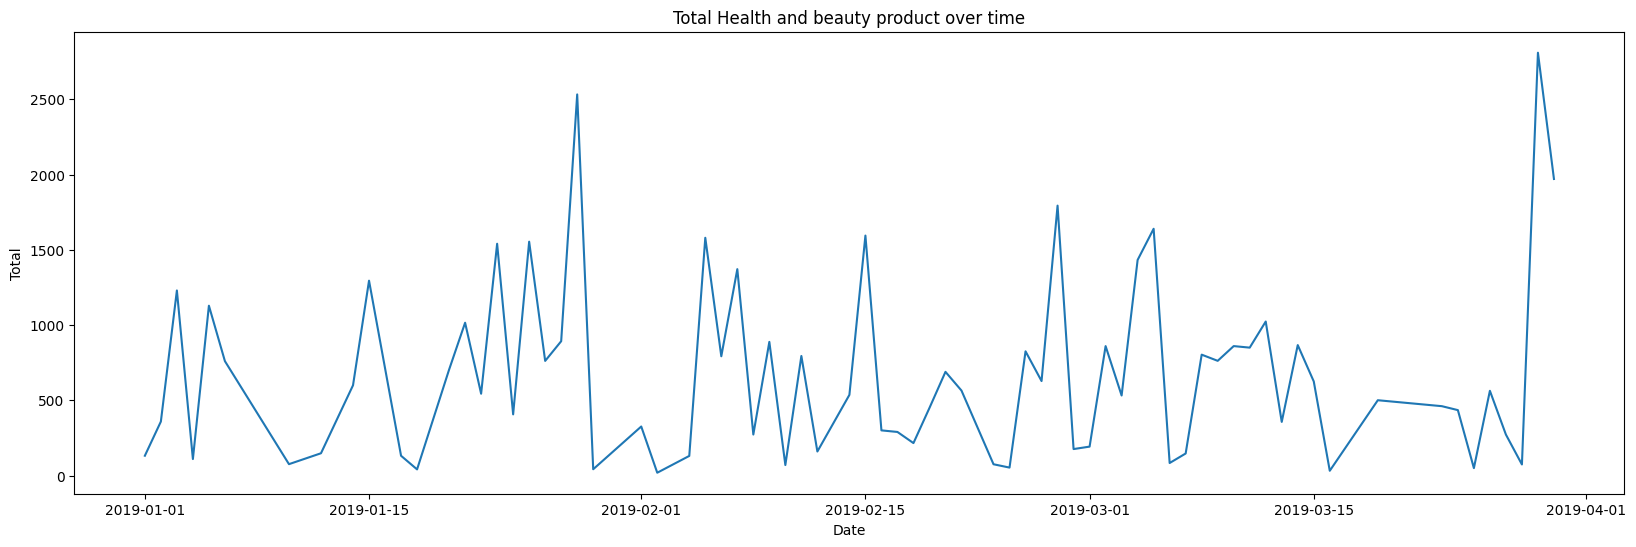

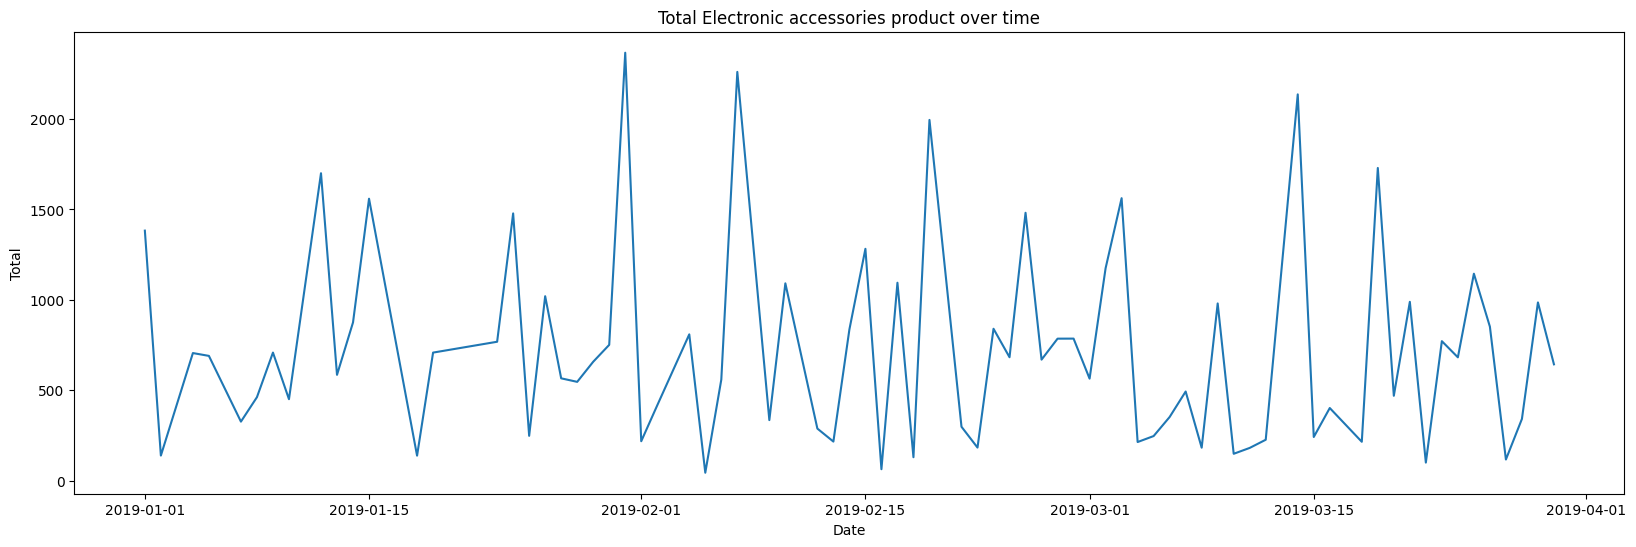

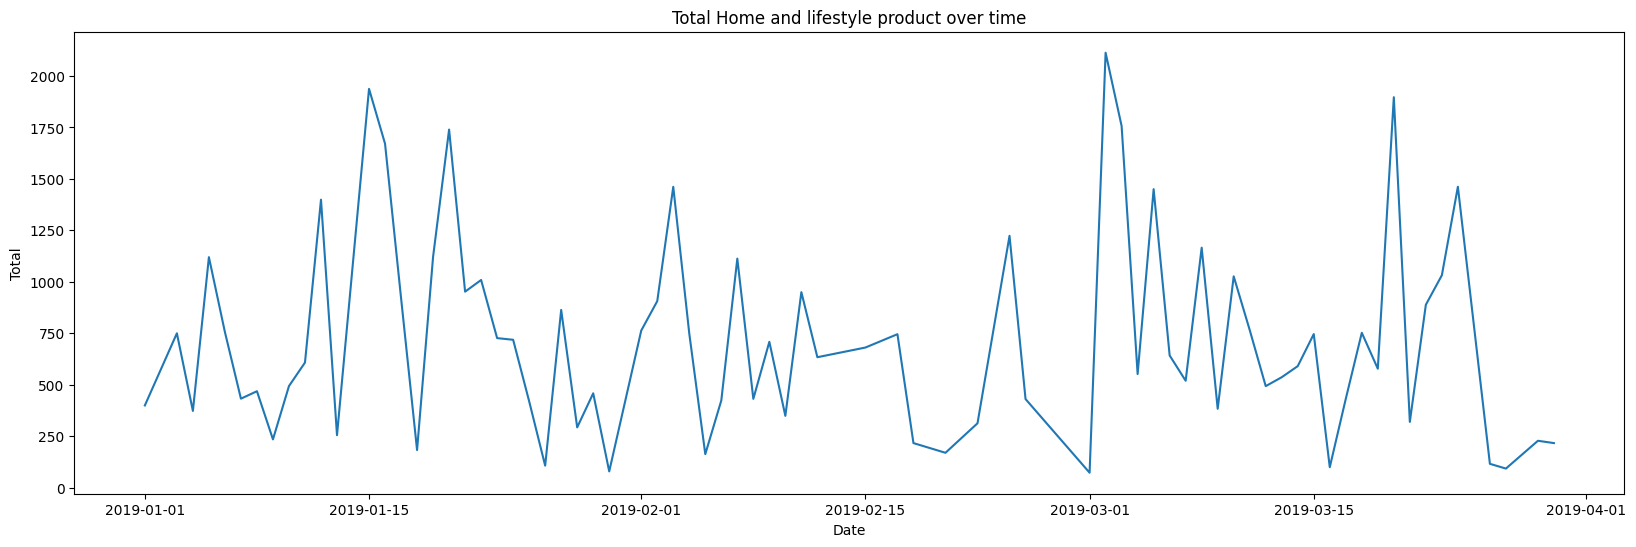

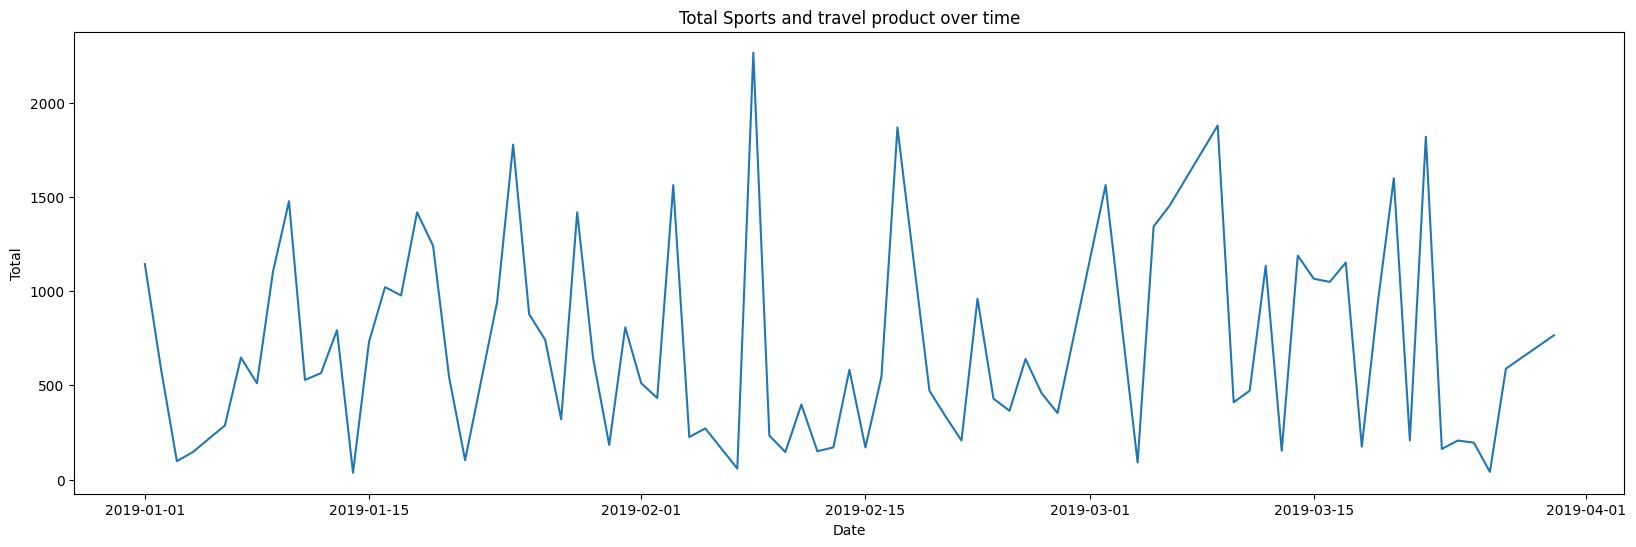

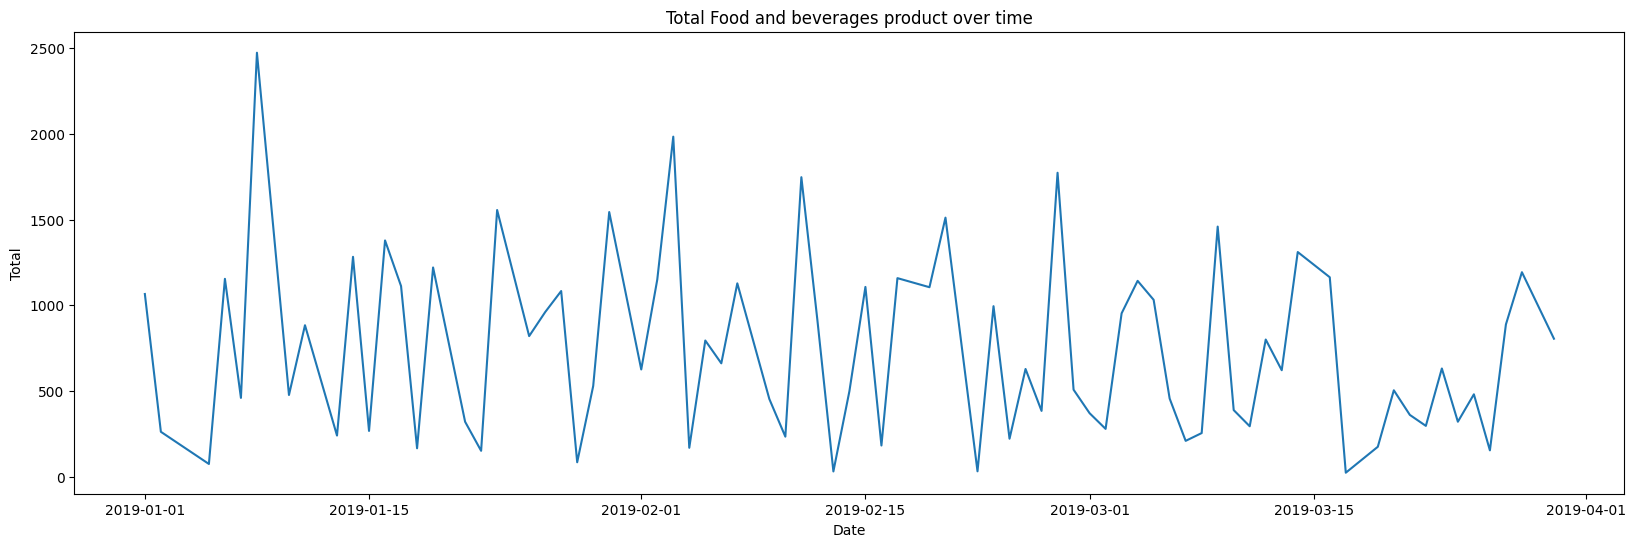

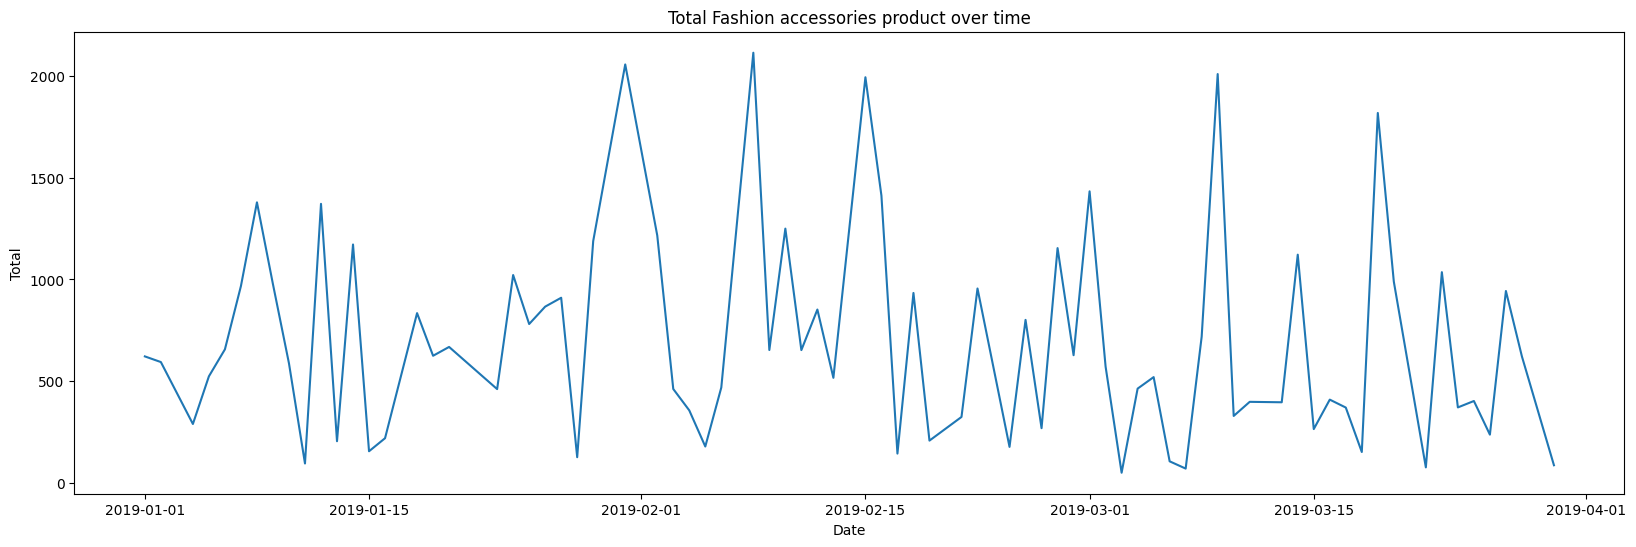

In [12]:
for c in df["Product line"].unique():
    trend_dict = {}
    for key, row in df[df["Product line"] == c].iterrows():
        if row["Date"] in trend_dict:
            trend_dict[row["Date"]] += row["Total"]
        else:
            trend_dict[row["Date"]] = row["Total"]
    t = np.zeros((0,2))
    for x in trend_dict:
        t = np.append(arr=t, values=[[x,trend_dict[x]]], axis=0)
    trend_df = pd.DataFrame(t, columns=["Date", "Total"])
    plt.figure(figsize=(20,6))
    sns.lineplot(data=trend_df, x="Date", y="Total")
    plt.title("Total {} product over time".format(c))

## Correlation

In [13]:
df = df.drop(["gross margin percentage"], axis=1)

In [14]:
df.corr()

C:\Users\Tri\AppData\Local\Temp\ipykernel_16576\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


C:\Users\Tri\AppData\Local\Temp\ipykernel_16576\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

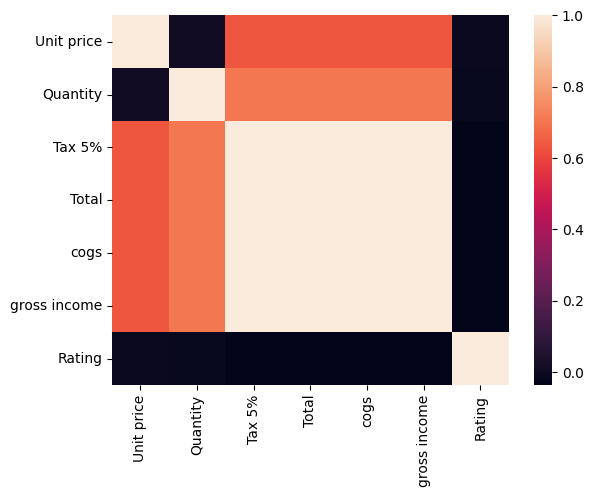

In [15]:
sns.heatmap(df.corr())

## Drop Analysis

In [16]:
df.dtypes

Invoice ID               object
Branch                   object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Tax 5%                  float64
Total                   float64
Date             datetime64[ns]
Time                     object
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object

In [17]:
df = df.drop(["Date", "Time", "Invoice ID", "Unit price", "Tax 5%"], axis=1)

In [18]:
df = pd.get_dummies(df)

# Modeling

In [19]:
x = df.drop(["Total"], axis=1)
y = df["Total"]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=24)

In [22]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(800, 23) (200, 23) (800,) (200,)


In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [24]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=24)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=24)),
    'ridge':make_pipeline(Ridge(random_state=24)),
    'lasso':make_pipeline(Lasso(random_state=24)),
    'enet':make_pipeline(ElasticNet(random_state=24)),
}

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [26]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [27]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(x_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for ridge.
ridge has been successfully fit.
Starting training for lasso.
lasso has been successfully fit.
Starting training for enet.
enet has been successfully fit.


In [28]:
fit_models['rf'].predict(x_test)

array([ 580.3749  ,   31.98363 ,  923.51679 ,  174.716535,  206.85    ,
        573.94596 ,  288.038415,  297.933405,  164.75655 ,   37.168005,
        350.032725,   85.27932 ,   83.56971 ,  944.977845,  695.411115,
        733.412715,  103.66461 ,  335.923875,  271.42017 ,  313.675635,
        240.34878 ,  138.86061 ,   83.4372  ,  167.629665,  479.13369 ,
        154.694505,  478.52889 ,  511.34832 ,  223.221705,   16.562595,
       1022.33355 ,   33.893685,  352.8651  ,  383.154975,   44.81736 ,
        489.994155,  176.95419 ,  401.30139 ,  439.346355,  318.11451 ,
         90.776805,  544.956825,  551.70213 ,  620.71905 ,  132.01818 ,
        620.12118 ,  103.1205  ,  684.60336 ,  263.39901 ,  936.53931 ,
         97.92069 ,  147.865305,  104.52183 ,  408.209025,  183.119265,
        209.558475,  235.94151 ,  578.46768 ,  407.897175,  259.1064  ,
        151.60446 ,  440.448435,   93.91452 ,  733.28745 ,  132.907215,
        679.776195,  720.487215,  609.026985,   57.14016 ,  868.

In [29]:
y_test

131    580.4190
354     31.7520
982    921.1860
476    174.6150
491    206.4300
         ...   
819    247.5900
0      548.9715
710    507.9060
889    807.6600
158    918.7290
Name: Total, Length: 200, dtype: float64

# Evaluating

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error

In [31]:
for algo,model in fit_models.items():
    yhat = model.predict(x_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rf scores - R2:0.9999570143147772 MAE:0.8683090500000159
gb scores - R2:0.9999245250100989 MAE:1.5990837387489296
ridge scores - R2:1.0 MAE:6.334272484309622e-09
lasso scores - R2:0.9999999999999997 MAE:3.964698869660666e-06
enet scores - R2:0.9999999999999997 MAE:4.063816221888672e-06


In [32]:
best_model = fit_models['ridge']

# Deployment

In [60]:
import joblib

In [61]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

In [34]:
from ibm_watson_machine_learning import APIClient
import json

In [35]:
cred = {
    "apikey":"3qRD8VTQ1m-c5ays4IOo4SWzabQMvdvtRZuMiaO0-QTB",
    "url": "https://jp-tok.ml.cloud.ibm.com"
}

In [36]:
client = APIClient(cred)
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------------------  ------------------------
ID                                    NAME                       CREATED
9551279a-4a37-46c3-880e-f1f58dea6104  SupermarketRegressionPROD  2023-07-31T04:30:03.491Z
------------------------------------  -------------------------  ------------------------


,ID,NAME,CREATED
0,9551279a-4a37-46c3-880e-f1f58dea6104,SupermarketRegressionPROD,2023-07-31T04:30:03.491Z


In [37]:
Space_ID = "9551279a-4a37-46c3-880e-f1f58dea6104"

In [38]:
client.set.default_space(Space_ID)

'SUCCESS'

In [39]:
Model_Name = "SupermarketRevenueForcasting"
Deployment_Name = "Supermarket Regression Deployment"
Best_Model = best_model

In [74]:
software_spec_uid = client.software_specifications.get_uid_by_name('runtime-22.2-py3.10')
software_spec_uid

'b56101f1-309d-549b-a849-eaa63f77b2fb'

In [83]:
model_props = {
    client.repository.ModelMetaNames.NAME : Model_Name,
    client.repository.ModelMetaNames.TYPE : 'scikit-learn_1.1',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid,
}

model_details = client.repository.store_model(
    model = Best_Model,
    meta_props = model_props,
    training_data = x_train,
    training_target = y_train,
    pipeline = pipelines['ridge']
)


2023-07-31 14:01:42,053 - ibm_watson_machine_learning.wml_client_error - WARNING - Publishing model failed.
Reason: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 31 Jul 2023 07:01:43 GMT', 'Content-Type': 'application/json', 'Content-Length': '282', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=5199428fa81274e3, intid;desc=5199428fa81274e3', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7ef3f8c1ecfa2113-HKG'})
HTTP response body: {
  "trace": "68d23713962ebb45d5c949a2b2a4b690",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'scikit-learn_1.3'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}



Traceback (most recent call last):
  File "D:\PracticeCode\Spark\MachineLearning\Lib\site-packages\ibm_watson_machine_learning\libs\repo\mlrepositoryclient\model_collection.py", line 245, in _save_scikit_pipeline_model
    model_artifact = self._create_pipeline_model(artifact, query_param)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\PracticeCode\Spark\MachineLearning\Lib\site-packages\ibm_watson_machine_learning\libs\repo\mlrepositoryclient\model_collection.py", line 505, in _create_pipeline_model
    model_artifact = self._create_pipeline_model_v4_cloud(model_artifact, query_param)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\PracticeCode\Spark\MachineLearning\Lib\site-packages\ibm_watson_machine_learning\libs\repo\mlrepositoryclient\model_collection.py", line 1018, in _create_pipeline_model_v4_cloud
    model_output = self.repository_api.ml_assets_model_creation_v4_cloud(model_input, query_par

WMLClientError: Publishing model failed.
Reason: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 31 Jul 2023 07:01:43 GMT', 'Content-Type': 'application/json', 'Content-Length': '282', 'Connection': 'keep-alive', 'server-timing': 'intid;desc=5199428fa81274e3, intid;desc=5199428fa81274e3', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'CF-Cache-Status': 'DYNAMIC', 'Server': 'cloudflare', 'CF-RAY': '7ef3f8c1ecfa2113-HKG'})
HTTP response body: {
  "trace": "68d23713962ebb45d5c949a2b2a4b690",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported model type 'scikit-learn_1.3'",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


In [77]:
model_uid = client.repository.get_model_id(model_details)
model_uid

'0c68058c-8f1e-41f5-b47f-1e0b0519706d'

In [79]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME : Deployment_Name,
    client.deployments.ConfigurationMetaNames.ONLINE : {}
}

deployment = client.deployments.create(
    artifact_uid = model_uid,
    meta_props = deployment_props
)

deployment



#######################################################################################

Synchronous deployment creation for uid: '0c68058c-8f1e-41f5-b47f-1e0b0519706d' started

#######################################################################################


initializing

2023-07-31 13:59:51,404 - ibm_watson_machine_learning.wml_client_error - WARNING - Deployment creation failed for deployment id: f1f00a6d-202f-41ab-85d0-52abae601fed. Errors: [{'code': '87198621b4828ed79f121c3dbe3cb114', 'message': 'Model loading through joblib failed with exception: KeyError and message: 2. The model object provided for deployment is either invalid or trained using a version of scikit-learn other than: 1.1'}]



Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

failed

--------------------------
Deployment creation failed
--------------------------


Model loading through joblib failed with exception: KeyError and message: 2. The model object provided for deployment is either invalid or trained using a version of scikit-learn other than: 1.1


WMLClientError: Deployment creation failed for deployment id: f1f00a6d-202f-41ab-85d0-52abae601fed. Errors: [{'code': '87198621b4828ed79f121c3dbe3cb114', 'message': 'Model loading through joblib failed with exception: KeyError and message: 2. The model object provided for deployment is either invalid or trained using a version of scikit-learn other than: 1.1'}]